In [2]:
import yfinance as yf
import ta
import pandas as pd

# Define the list of symbols
symbols = ["AAPL", "MSFT", "GOOG", "AMZN", "TSLA", "NVDA", "JPM", "V", "JNJ", "BAC"]

# Define the date range
end_date = pd.Timestamp.today()
start_date = end_date - pd.Timedelta(days=365)

# Download the historical stock prices for each symbol
dfs = []
for symbol in symbols:
    df = yf.download(symbol, start_date, end_date)
    df['Symbol'] = symbol
    dfs.append(df)

# Combine the data for all symbols into a single dataframe
df = pd.concat(dfs)

# Compute the technical indicators
df = ta.add_all_ta_features(df, open="Open", high="High", low="Low", close="Close", volume="Volume", fillna=True)

# Remove rows with missing values
df.dropna(inplace=True)

# Preview the data
print(df.head())

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


/workspace/.pip-modules/lib/python3.8/site-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in scalar divide
  dip[idx] = 100 * (self._dip[idx] / value)
/workspace/.pip-modules/lib/python3.8/site-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in scalar divide
  din[idx] = 100 * (self._din[idx] / value)


                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-02-23  165.539993  166.149994  159.750000  160.070007  159.106186   
2022-02-24  152.580002  162.850006  152.000000  162.740005  161.760132   
2022-02-25  163.839996  165.119995  160.869995  164.850006  163.857407   
2022-02-28  163.059998  165.419998  162.429993  165.119995  164.125763   
2022-03-01  164.699997  166.600006  161.970001  163.199997  162.217331   

               Volume Symbol    volume_adi  volume_obv  volume_cmf  ...  \
Date                                                                ...   
2022-02-23   90009200   AAPL -8.100807e+07    90009200   -0.899998  ...   
2022-02-24  141147500   AAPL  5.727744e+07   231156700    0.247786  ...   
2022-02-25   91974200   AAPL  1.375660e+08   323130900    0.425728  ...   
2022-02-28   95056600   AAPL  2.135475e+08   418187500    0.510650  ...   
2022-03-01   83474400   AAPL  1

2. Now we will do a train - validation test split of 60-20-20 on our dataset. In this split we will seperate the data into training (60), validation (20) and testing (20)

First we use the training set to train the machine learning model 
Secondly we will use the validation set to tune the hyperparameters
Thirdly we use the testing set to evaluate the performance of our model

In [6]:
from sklearn.model_selection import train_test_split

# Split the data into train, validation, and test sets
train, test = train_test_split(df, test_size=0.2, shuffle=False)
train, val = train_test_split(train, test_size=0.25, shuffle=False)

# Print the sizes of the train, validation, and test sets
print("Train set size:", len(train))
print("Validation set size:", len(val))
print("Test set size:", len(test))

Train set size: 1506
Validation set size: 502
Test set size: 502


Q3 Now we will train a regression model using 

a) Linear Regression

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


/workspace/.pip-modules/lib/python3.8/site-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in scalar divide
  dip[idx] = 100 * (self._dip[idx] / value)
/workspace/.pip-modules/lib/python3.8/site-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in scalar divide
  din[idx] = 100 * (self._din[idx] / value)


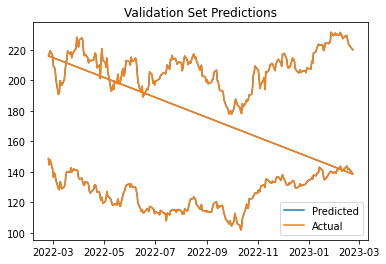

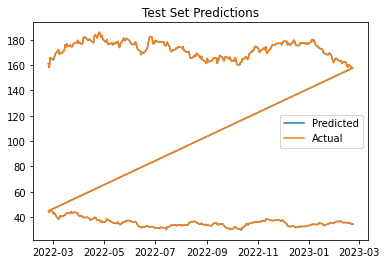

In [2]:
import yfinance as yf
import ta
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Define the list of symbols
symbols = ["AAPL", "MSFT", "GOOG", "AMZN", "TSLA", "NVDA", "JPM", "V", "JNJ", "BAC"]

# Define the date range
end_date = pd.Timestamp.today()
start_date = end_date - pd.Timedelta(days=365)

# Download the historical stock prices for each symbol
dfs = []
for symbol in symbols:
    df = yf.download(symbol, start_date, end_date)
    df['Symbol'] = symbol
    dfs.append(df)

# Combine the data for all symbols into a single dataframe
df = pd.concat(dfs)

# Compute the technical indicators
df = ta.add_all_ta_features(df, open="Open", high="High", low="Low", close="Close", volume="Volume", fillna=True)

# Remove rows with missing values
df.dropna(inplace=True)

# Split the data into train, validation, and test sets
train, test = train_test_split(df, test_size=0.2, shuffle=False)
train, val = train_test_split(train, test_size=0.25, shuffle=False)

# Define the input features and output variable for training
X_train = train.drop(["Symbol", "Close"], axis=1)
y_train = train["Close"]

# Create an instance of the LinearRegression class
reg = LinearRegression()

# Fit the model to the training data
reg.fit(X_train, y_train)

# Use the trained model to make predictions on the validation and test sets
X_val = val.drop(["Symbol", "Close"], axis=1)
y_val = val["Close"]
y_pred_val = reg.predict(X_val)

X_test = test.drop(["Symbol", "Close"], axis=1)
y_test = test["Close"]
y_pred_test = reg.predict(X_test)

# Plot the predicted prices and actual prices for the validation set
plt.plot(y_val.index, y_pred_val, label="Predicted")
plt.plot(y_val.index, y_val, label="Actual")
plt.title("Validation Set Predictions")
plt.legend()
plt.show()

# Plot the predicted prices and actual prices for the test set
plt.plot(y_test.index, y_pred_test, label="Predicted")
plt.plot(y_test.index, y_test, label="Actual")
plt.title("Test Set Predictions")
plt.legend()
plt.show()

Using the